# Data Science With Python

In [2]:
#import necessari per la pagina

import numpy as np #array
import matplotlib.pyplot as plt #graphics
import pandas as pd #dataframe
import seaborn; seaborn.set() #visualisation


Test funzione %timeit: Misura quanto tempo serve per eseguire un task

In [1]:
%timeit L=[n for n in range(1000)]

48.1 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


%%timeit consente di mettere chunks di codice per la misura del tempo impiegato

In [2]:
%%timeit
L=[]
for n in range(1000):
    L.append(n)

100 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


per sorting e operazioni simili conviene usare %time. Perché se no fa più test ma una lista già ordinata occupa poco tempo

In [3]:
import random
L=[random.random() for i in range (10000)]
%time L.sort()

CPU times: user 1.67 ms, sys: 81 µs, total: 1.76 ms
Wall time: 1.99 ms


## Capitolo 2 - Numpy

comando chiave per importare numpy

In [1]:
import numpy as np

diversi modi per creare arrays di numpy (caratterizzati da avere elementi tutti dello stesso tipo)

In [17]:
# da lista
L=[0,2,4,6]
L_arr = np.array(L)
print(L_arr)

# array di zeri
A_zero = np.zeros(5)
print(A_zero)

# array di 1
A_one = np.ones(5)
print(A_one)

#array random gauss
A_random = np.random.normal(0,2, 25)
print(A_random)

#array multidimensionale
A_matrix = np.random.random((3,3))
print(A_matrix)

#array VUOTO
A_empty = np.empty(10)
print(A_empty)

del(A_empty, A_matrix, A_random, A_one, A_zero)

[0 2 4 6]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[ 2.71961658  1.22512611  1.48343917 -0.48200563 -1.09597655  3.0827877
 -0.35856237  0.41877052 -2.31711514  4.26784207 -3.25040546 -0.36413928
 -0.96377617 -0.98075189  0.77127863  3.04697099 -1.42328894 -0.27581734
 -1.05928896 -2.8113625  -3.00446092 -4.96672969  2.91612972 -1.70270507
 -0.41766618]
[[0.36926754 0.76390281 0.3100574 ]
 [0.80744772 0.10696832 0.33585697]
 [0.70854018 0.85775763 0.59228522]]
[-1.72723371e-077 -1.72723371e-077  5.43472210e-323  0.00000000e+000
  0.00000000e+000  1.04082753e-047  4.51520796e-090  1.14349538e-071
  2.36721335e+179  2.93003235e-057]


### 1- Manipolazione di Array

In [8]:
#creo array con numeri casuali

np.random.seed(0) #seme per la generazione di numeri casuali
x1 = np.random.randint(10, size= 6)
x2 = np.random.randint(10, size = (3,4))
x3 = np.random.randint(10, size= (3,4,5))

#accesso a dim, shape e size
print("x3.ndim:", x3.ndim, "\n"
     "x3.nshape:", x3.shape, "\n"
     "x3.size:", x3.size)

x3.ndim: 3 
x3.nshape: (3, 4, 5) 
x3.size: 60


#### Indexing

l'accesso a elementi di un array è dato nominando l'indice contando a partire da 0. Per array multimensdionali è da tenere presente l'ordinamento [row, column]

In [14]:
print("il 5o elemento dell'array x1:",x1[4])
print("controllo:",x1)
print("terza colonna prima riga di x2:", x2[0,2])
print("controllo:\n", x2)

il 5o elemento dell'array x1: 7
controllo: [5 0 3 3 7 9]
terza colonna prima riga di x2: 2
controllo:
 [[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


#### Accessing and Slicing

L'accesso a elementi di un array (anche multipli) si ha tramite le parentesi quadre. n_array[start:stop:step] è la sintassi per individuarli

In [21]:
#esempi di accesso e slicing

x = np.arange(10)

print("I primi 5 elementi", x[0:5])
print("Gli elementi dopo il 5o", x[5:])
print("Gli elementi con indice pari (inizio a contare da 0)\n", x[::2])
print("Gli elementi con indice dispari \n", x[1::2])

I primi 5 elementi [0 1 2 3 4]
Gli elementi dopo il 5o [5 6 7 8 9]
Gli elementi con indice pari (inizio a contare da 0)
 [0 2 4 6 8]
Gli elementi con indice dispari 
 [1 3 5 7 9]


Per aray multidimensionali la sintassi è [ start_d1: end_d1: step_d1 , ... start_dn: end_dn: step_dn ]

In [24]:
#esempio

print("stampa la matrice x2 eliminando ultima riga e ultima colonna:\n",x2[:2,:3])

stampa la matrice x2 eliminando ultima riga e ultima colonna:
 [[3 5 2]
 [7 6 8]]


attenzione, lo slicing punta all'oggetto individuale non a copie che vengono create. Cosa significa? Significa che se modifico l'oggetto ottenuto dallo slicing allora vado a modificare anche l'originale

In [26]:
#esempio

x2_sub = x2[:2,:3]
print("slicing della matrice x2:\n", x2_sub)

x2_sub[1,1] = 34

print("x2_sub dopo la modifica di un suo elemento:\n",x2_sub)

print("x2 dopo la modifica di un elemento di x2_sub:\n",x2)

print('La modifica su x2_sub interessa chiaramente x2_sub, ma anche x2 stesso'oggetto stesso quanto anche )

slicing della matrice x2:
 [[3 5 2]
 [7 6 8]]
x2_sub dopo la modifica di un suo elemento:
 [[ 3  5  2]
 [ 7 34  8]]
x2 dopo la modifica di un elemento di x2_sub:
 [[ 3  5  2  4]
 [ 7 34  8  8]
 [ 1  6  7  7]]


Per creare copie posso usare un metodo apposito. copy()

In [27]:
x2_sub_copy = x2[:2,:3].copy()

x2_sub_copy[1,1] = 23

print("x2_sub dopo la modifica di un suo elemento:\n",x2_sub_copy)

print("x2 dopo la modifica di un elemento di x2_sub_copy:\n",x2)

x2_sub dopo la modifica di un suo elemento:
 [[ 3  5  2]
 [ 7 23  8]]
x2 dopo la modifica di un elemento di x2_sub_copy:
 [[ 3  5  2  4]
 [ 7 34  8  8]
 [ 1  6  7  7]]


#### Concatenate e splitting
Gli array possono essere combinati tra loro o divisi in array più piccoli con i metodi concatenate e split.


In [34]:
#esempio concatenate

x1= np.random.random(10)
x2= np.random.random(10)
x3= np.concatenate([x1,x2])

print(x1, "\n", x2, "\n", x3, '\n')

[0.39486929 0.61880856 0.47486752 0.47013219 0.71607453 0.287991
 0.38346223 0.74916984 0.87845219 0.10286336] 
 [0.09237389 0.35404666 0.55181626 0.03362509 0.96896177 0.32099724
 0.22126269 0.1412639  0.09725993 0.98404224] 
 [0.39486929 0.61880856 0.47486752 0.47013219 0.71607453 0.287991
 0.38346223 0.74916984 0.87845219 0.10286336 0.09237389 0.35404666
 0.55181626 0.03362509 0.96896177 0.32099724 0.22126269 0.1412639
 0.09725993 0.98404224] 



In [39]:
#esempio split ->devo passare gli indici degli elementi da splittare

x = np.array([1,2,3,5,6,7,8,9,0])
x1, x2, x3 = np.split(x, [3,5])
print(x1,'\n', x2, '\n',x3)

[1 2 3] 
 [5 6] 
 [7 8 9 0]


### 2-Calcoli con Array

Il fatto che python sia un linguaggio interpretato basato su C lo rende molot poco efficiente nel compiere determinate operazioni come ad esempio i cicli

In [48]:
def compute_rec(values):
    output = np.empty(len(values))
    for i in range (len(values)):
        output[i]= 1./values[i]
    return output

In [44]:
values = np.random.randint(1,20,10)
print('vettore iniziale:',values)

%timeit output = compute_rec(values)
print('inversi:', output)


vettore iniziale: [ 3  3  2  6  9  5  1 12  3  6]
7.53 µs ± 71.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
inversi: [0.05263158 0.07692308 0.25       0.1        0.09090909 0.07142857
 0.125      0.125      0.5        0.07692308]


In [49]:
#se però ci metto un vettore grande
big_arr = np.random.randint(1,100, size=1000000)
%timeit compute_rec(big_arr)

3.1 s ± 175 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


cosa succede invece se non creo una funzione apposta per il calcolo dei reciproci ma divido subito tutto il vettore?

In [50]:
%timeit 1./big_arr

4.29 ms ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Si tratta di usare quelle che sono note come funzioni universali di python che consentono di operare su un array riducendo il numero di cicli che devono essere messe in moto, riducendo i tempi (nel caso precedente di $10^3$ volte)

#### Aritmetica

In [74]:
# esempi di operazioni aritmetiche con le ufunctions

x = np.random.randint(1,100,10)
print('x =',x)
print('x + 2 =', x+2)
print('x * 2 =', x*2)
print('x - 2 =', x-2)
print('x / 2 =', x/2)
print('x ** 2 =', x**2)
print('=======================Modulo====================')
x = np.random.randint(-10, 10, 10)
print('x =',x)
print('abs(x) =',abs(x))
print('=======================Trigonometria====================')
x = np.random.random((10)) * np.random.randint(1,3)
print('x =',x)
print('sin(x) =',  np.sin(x))
print('cos(x) =',  np.cos(x))
#print('arccos(x) =',  np.arccos(x))
print('=======================Exp e Log====================')
x = np.linspace(1,10,10)
print('x =',x)
print('exp(x) = ', np.exp(x))
print('2^x = ', np.exp2(x))
print('ln(x)=', np.log(x))
print('log_10(x)=', np.log10(x))

x = [28  1 60 72 20 53 43 31 30 38]
x + 2 = [30  3 62 74 22 55 45 33 32 40]
x * 2 = [ 56   2 120 144  40 106  86  62  60  76]
x - 2 = [26 -1 58 70 18 51 41 29 28 36]
x / 2 = [14.   0.5 30.  36.  10.  26.5 21.5 15.5 15.  19. ]
x ** 2 = [ 784    1 3600 5184  400 2809 1849  961  900 1444]
=======================Modulo====================
x = [ 4  2 -5  2 -5 -6  5 -1 -2 -6]
abs(x) = [4 2 5 2 5 6 5 1 2 6]
=======================Trigonometria====================
x = [0.52251623 0.01168336 0.34031151 0.67401109 0.09928465 0.86208679
 0.21039659 0.84179947 0.99363431 0.81622302]
sin(x) = [0.49906219 0.01168309 0.33378075 0.62412497 0.09912162 0.75920241
 0.20884776 0.74584299 0.83801456 0.72856389]
cos(x) = [0.86656617 0.99993175 0.94265073 0.78132453 0.99507533 0.65085459
 0.97794817 0.66612178 0.54564786 0.68497786]
=======================Exp e Log====================
x = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
exp(x) =  [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413

È possibile in molti casi specificare l'output senza dover creare copie temporanee con np e le funzioni built in

In [78]:
#esempi
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 2, out=y)
print(y)

[0. 2. 4. 6. 8.]


#### Operazioni algebriche

Python consente di operare con la libreria np algebricamente sui vettori in maniera più veloce rispetto a quanto non faccia con le liste.

In [79]:
# esempio

big_arr = np.random.random(1000000)
%timeit sum(big_arr)
%timeit np.sum(big_arr)

203 ms ± 9.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
621 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Timeit mostra che ballano 3 odg tra il calcolo svolto con la funzione build in e quello fatto con il metodo apposito di np. Analogamente si opera con min e max

In [80]:
%timeit min(big_arr)
%timeit max(big_arr)

%timeit np.min(big_arr)
%timeit np.max(big_arr)

130 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
128 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
746 µs ± 184 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
689 µs ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 3-Esempi di Manipolazione dati con np

Abbiamo un file che riporta la statura dei presidenti degli stati uniti e vogliamo fare un po di statistica

In [81]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [101]:
import pandas as pd

df = pd.read_csv('data/president_heights.csv')

height = np.array(df['height(cm)'])

print('Stats')
print('Media =', np.average(height))
print('Std_dev =', np.std(height))
print('Max =', np.max(height))
print('Min =', np.min(height))
print('.25 percentile =', np.percentile(height, 25))
print('Mediana =', np.median(height))


Stats
Media = 179.73809523809524
Std_dev = 6.931843442745892
Max = 193
Min = 163
.25 percentile = 174.25
Mediana = 182.0


Text(0.5, 0, 'Height(cm)')

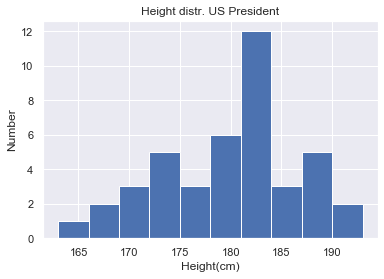

In [105]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(height)
plt.title("Height distr. US President")
plt.ylabel('Number')
plt.xlabel('Height(cm)')


### 4-Broadcasting
Il broadcasting è molto utile ad esempio quando si plottano funzioni in due dimensioni con un contour plot. La procedura consiste nel far avvenire i loop a livello C invece che nell'interprete di python e risulta in una computazione più flessibile e più veloce.

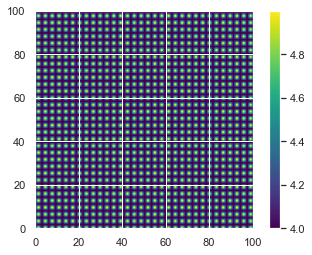

In [110]:
#esempio

x = np.linspace(0,100,1000)
y = np.linspace(0,100,1000)[:, np.newaxis]

def func(x,y):
    return 4 + np.sin(x)**2 *(np.cos(y))**2

plt.imshow(func(x,y), origin='lower', extent =[0,100,0,100], cmap='viridis')
plt.colorbar()

### 5-Comparazione con Array
Gli array possono essere utilizzati anche per operazioni di natura logica e non solo numerica. Per estrarre informazioni di varia natura.

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

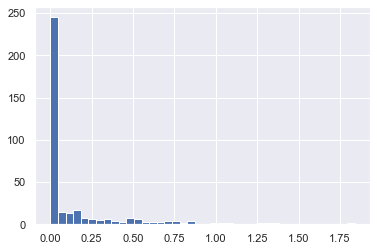

In [7]:
df = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = df/254
plt.hist(inches, 40)


posso usare elementi di comparazione per vedere in quante circostanze si verifica un certo fenomeno.
Ad esempio supponiamo che io voglia sapere quante volte è caduta più 0.5 inch di pioggia a seattle, e quanti con pioggia compresa tra 0.5 e 1 inch.

In [10]:
inches > 0.5 #vettore di Booleani (True, False)

print("Giorni con più di 0.5 inches di precipitazioni:",np.sum(inches>0.5))
print("Giorni con più di 0.5 inches di precipitazioni ma meno di 1:",np.sum((inches>0.5) & (inches<1) ) )

Giorni con più di 0.5 inches di precipitazioni: 37
Giorni con più di 0.5 inches di precipitazioni ma meno di 1: 29


Ora voglio determinare quanti giorni ci sono stati con precipitazioni, senza precipitazioni, e con meno di 1 inch di precipitazioni.

In [14]:
print('# Giorni senza pioggia:', np.sum(inches == 0))
print('# Giorni con pioggia:', np.sum(inches != 0))
print('# Giorni con meno di 0.1 inch:', np.sum(inches <0.1))

# Giorni senza pioggia: 215
# Giorni con pioggia: 150
# Giorni con meno di 0.1 inch: 261


I valori Booleani possono essere usati come maschere per imporre condizioni. Ad esempio se volgio calcolare grandezze statistiche rilevanti sulla pioggia a seattle nel periodo estivo

In [31]:
summer = (np.arange(365) -172 < 90) & (np.arange(365) -172 > 0 )
rainy = inches>0

print("Mediana pioggia Seattle:", np.median(inches[rainy]))
print("Mediana pioggia Seattle estate:", np.median(inches[summer])) 
print("Max pioggia Seattle estate:", np.max(inches[summer]))
print("Average pioggia Seattle non estate:", np.average(inches[rainy & ~summer]))
#[summer] equivale a richiedere 'tale che la condizione summer is true'

Mediana pioggia Seattle: 0.19488188976377951
Mediana pioggia Seattle estate: 0.0
Max pioggia Seattle estate: 0.8503937007874016
Average pioggia Seattle non estate: 0.3356009726725335


### 6-Fancy Indexing

Il FI è una procedura che consente di accedere a elementi di array in maniera più agevole tramite indicizzazione invece che tramite il loro valore

In [34]:
#esempio

x = np.random.randint(10,20,5)
print(x)
ind = [1,4,2] #Seleziono indici in una lista
print("Stampo in ordine gli elementi con indici selezionati:", x[ind])

[12 12 17 16 17]
Stampo in ordine gli elementi con indici selezionati: [12 17 17]


In particolare è molto utilizzato per selezionare alcuni elementi e evidenziarli

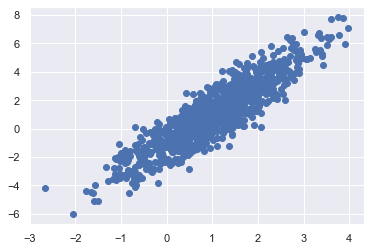

In [38]:
mean =[1,1]
cov = [[1,2],[2,5]]
X =np.random.multivariate_normal(mean, cov, 1000)

plt.scatter(X[:,0], X[:,1])

#seleziono 100 elementi a caso da questa matrice con FI

# 1- seleziono indici senza ripetizioni
indices = np.random.choice(1000, 100)
# 2- uso gli indici per selezionare gli oggetti
Obj = X[indices]


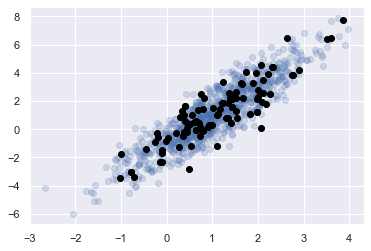

In [41]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(Obj[:,0], Obj[:,1], c='black')

Il fancy indexing è anche un metodo che può essere utilizzato per modificare i dati degli array

In [44]:
#esempio

x = np.random.randint(1,200, 30)
ind = [1,2,3,4,5,10]
print(x[ind])
print(x[ind]+10)

[158 105 124  92 151  10]
[168 115 134 102 161  20]


### 7-Sorting

I migliori metodi di sorting su numpy sono implementati con algoritmi di quicksort e mergesort

In [47]:
#esempi

x = np.random.randint(0,100,30)
print(x)
%timeit np.sort(x)


[81 15 26 63 30 43 60 37 77 94 11 98 44 95 62 39 98 32 66 70 47  0 53 31
 57  0 29 58 11 98]
3.7 µs ± 673 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[81 15 26 63 30 43 60 37 77 94 11 98 44 95 62 39 98 32 66 70 47  0 53 31
 57  0 29 58 11 98]


In [49]:
x = np.random.randint(1,10, (4,6))
print(x)

#posso ordinare righe e colonne specificando axis

print(np.sort(x, axis=0))

[[1 3 4 9 7 6]
 [6 6 3 5 1 3]
 [7 7 5 5 3 4]
 [4 8 8 1 3 6]]
[[1 3 3 1 1 3]
 [4 6 4 5 3 4]
 [6 7 5 5 3 6]
 [7 8 8 9 7 6]]


#### K nearest

Metodo usato anche in ML estensivamente

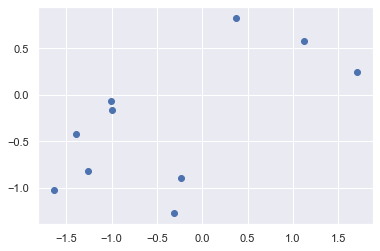

In [73]:
X = np.random.randn(10,2)

plt.scatter(X[:,0],X[:,1])

(10, 10, 2)
(10, 10)
[[0 7 5 6 4 2 1 9 8 3]
 [1 5 2 6 4 7 0 9 8 3]
 [2 5 6 4 1 0 7 9 8 3]
 [3 8 9 0 7 4 6 5 2 1]
 [4 6 2 5 0 1 7 9 8 3]
 [5 1 2 6 4 0 7 9 8 3]
 [6 4 2 5 0 1 7 9 8 3]
 [7 0 5 6 1 2 4 9 8 3]
 [8 3 9 0 4 6 7 2 5 1]
 [9 8 3 4 6 0 2 7 5 1]]
====================k-nearest====================
[[7 0 5 6 4 1 3 2 8 9]
 [1 5 2 6 4 7 0 3 8 9]
 [2 5 6 4 1 0 3 7 8 9]
 [3 9 8 0 1 5 6 7 2 4]
 [4 6 2 5 0 1 3 7 8 9]
 [5 1 2 6 4 0 3 7 8 9]
 [6 4 2 5 0 1 3 7 8 9]
 [7 5 0 6 1 2 4 3 8 9]
 [3 9 8 0 1 5 6 7 2 4]
 [3 9 8 4 1 5 6 7 2 0]]


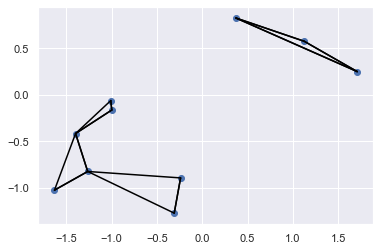

In [74]:
#matrice delle distanze tra i punti

distances = X[np.newaxis,:,:] -X[:, np.newaxis,:] #newaxis aumenta di una dimensione
sqdiff = distances**2
print(sqdiff.shape)
sqdist = sqdiff.sum(-1) #la somma avviene rispetto all'ultima dimensione
print(sqdist.shape)

nearest = np.argsort(sqdist, axis =1)
print(nearest)
k=2
print('====================k-nearest====================')
k_nearest = np.argpartition(sqdist,k+1, axis = 1)
print(k_nearest)

plt.scatter(X[:,0], X[:,1])
for i in range(X.shape[0]):
    for j in k_nearest[i, :k+1]:
        plt.plot(*zip(X[j], X[i]), c="black")
        